In [1]:
# return suggested tickers from search

import requests
import json
import pandas as pd

key = "3SK9BB22RHSIBTQ3"

keyword = "apple" # what user types in search bar

url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={keyword}&apikey={key}'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


In [5]:
# print json data

def print_json(data, indent=0):
    if isinstance(data, dict):
        for key, value in data.items():
            print(" " * indent + str(key) + ":")
            print_json(value, indent + 4)
    elif isinstance(data, list):
        for item in data:
            print_json(item, indent + 4)
    else:
        print(" " * indent + str(data))

In [4]:
# return recent financial statement information

symbol = "IBM"

# Income statement

# url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={key}'
# r = requests.get(url)
# data = r.json()


# print(data)

# print("JSON dictionary keys: ")
# for key in data:
#   print(key)
# print("\n")

# # print_json(data)

# annual_reports = data["annualReports"]
# df = pd.DataFrame(annual_reports)
# list(df.columns)




{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


In [30]:
# Not using API:

import pandas as pd
import json

income_statement_path = "./data/income_statement.json"

with open(income_statement_path, 'r') as file:
  IS_data = json.load(file)

IS_annualReports = IS_data["annualReports"]
IS_quarterlyReports = IS_data["quarterlyReports"]

IS_AR_df = pd.json_normalize(IS_quarterlyReports)

IS_AR_df = IS_AR_df.iloc[::-1].reset_index(drop=True)

In [45]:
columns_2_integers = [col for col in IS_AR_df.columns if col not in ['fiscalDateEnding', 'reportedCurrency']]

# print(columns_2_integers)

IS_AR_df[columns_2_integers] = IS_AR_df[columns_2_integers].apply(pd.to_numeric, errors='coerce').astype('Int64')

null_counts = IS_AR_df.isnull().sum()
null_counts


fiscalDateEnding                      0
reportedCurrency                      0
grossProfit                           0
totalRevenue                          0
costOfRevenue                         0
costofGoodsAndServicesSold            0
operatingIncome                       0
sellingGeneralAndAdministrative       0
researchAndDevelopment                0
operatingExpenses                     0
investmentIncomeNet                  61
netInterestIncome                     0
interestIncome                       39
interestExpense                       0
nonInterestIncome                    27
otherNonOperatingIncome               6
depreciation                          1
depreciationAndAmortization           0
incomeBeforeTax                       0
incomeTaxExpense                      0
interestAndDebtExpense                1
netIncomeFromContinuingOperations     0
comprehensiveIncomeNetOfTax           0
ebit                                  0
ebitda                                0


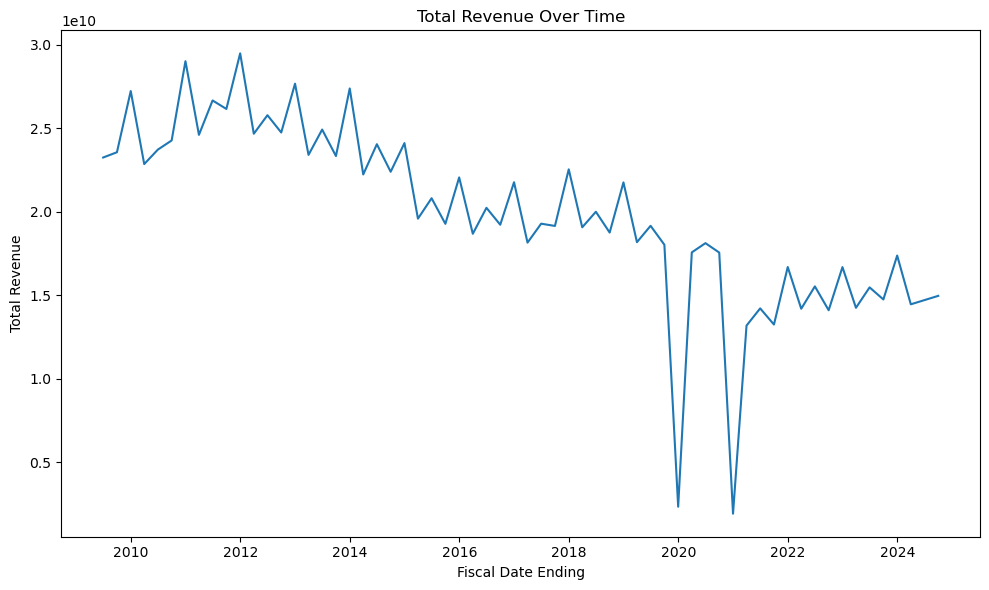

In [59]:
# Convert date columns into proper date type
# Plot revenue vs date

import matplotlib.pyplot as plt

IS_AR_df['fiscalDateEnding'] = pd.to_datetime(IS_AR_df['fiscalDateEnding'])

plt.figure(figsize=(10,6))
plt.plot(IS_AR_df['fiscalDateEnding'], IS_AR_df['totalRevenue'])
plt.xlabel("Fiscal Date Ending")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over Time")
plt.tight_layout()

In [75]:
[print(val) for val in IS_AR_df['totalRevenue']]

23250000000
23566000000
27230000000
22857000000
23724000000
24271000000
29018000000
24607000000
26666000000
26157000000
29486000000
24673000000
25783000000
24747000000
27671000000
23408000000
24924000000
23338000000
27385000000
22236000000
24047000000
22397000000
24113000000
19590000000
20813000000
19280000000
22059000000
18684000000
20238000000
19226000000
21770000000
18155000000
19289000000
19153000000
22542000000
19072000000
20003000000
18756000000
21761000000
18182000000
19161000000
18028000000
2344000000
17571000000
18123000000
17560000000
1926000000
13187000000
14218000000
13251000000
16694000000
14197000000
15535000000
14107000000
16690000000
14252000000
15475000000
14752000000
17381000000
14462000000
14968000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# # Balance Sheet

# url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={key}'
# r = requests.get(url)
# data = r.json()

# print("balance sheet: ")
# print(data)


# # Cash Flow

# url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={symbol}&apikey={key}'
# r = requests.get(url)
# data = r.json()

# print("cash flow: ")
# print(data)